# Exploratory Data Analysis



In [1]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [3]:
#Load dataset
df=pd.read_csv('winequality-red.csv')

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
#shape of data set (rows,columns)
print(df.shape)

(1599, 12)


In [6]:
#data types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#Summary of dataset-general statistics
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#quality-score 0 to 10
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

##### Observation: Looks like min score is 3 and max. score of 8 with most of wines given a score of 5

### Let's Visually represent it

In [11]:
#quality score distribution
df['quality'].iplot(kind='hist',xTitle='quality',yTitle='count',title='quality distribution')

## Correlation between Variables

With so many features it is a tedious task to perform univariate analysis . So lets try to find out how variables vary with respect to each other, so that we can know what are important features

In [12]:
import plotly.figure_factory as ff

In [13]:
corrs=df.corr()

In [14]:
# Plotting Heatmap to know about Correlation
figure=ff.create_annotated_heatmap(z=corrs.values,x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000

iplot(figure)

##### Observation: 
* pH vs fixed acidity(negative correlation)
* density vs fixed acidity (positive correlation)
* citric acid vs fixed acidity(positive correlation)
* citric acid vs volatile acidity(negative correlation)
* free sulphur dioxide vs total sulphur dioxide(positive correlation)
* density vs alcohol(negative correlation)

## Lets see few examples separately how variables vary using scatter plots

In [38]:
fixedacidity_pH=df[['pH','fixed acidity']]


fixedacidity_pH.sort_values('fixed acidity').iplot(x='pH',y='fixed acidity',xTitle='pH',yTitle='fixed acidity',mode='markers',title='ph vs fixed acidity',bestfit=True,bestfit_colors=['blue'])

#### Observation: 
With increase in pH , fixed acidity value is reducing(negative correlation) click on 5.48*x+00 which will best fitted curve

In [39]:
fixedAcidity_citricAcid = df[['citric acid', 'fixed acidity']]

fixedAcidity_citricAcid.sort_values('fixed acidity').iplot(x='citric acid',y='fixed acidity',xTitle='citric acid',yTitle='fixed acidity',mode='markers',title='citric acid vs fixed acidity',bestfit=True,bestfit_colors=['blue'])

##### Observation:
 With increase in citric acid , fixed acidity value is increasing(positive correlation)

In [33]:
quality_acid=df[['quality','alcohol']]

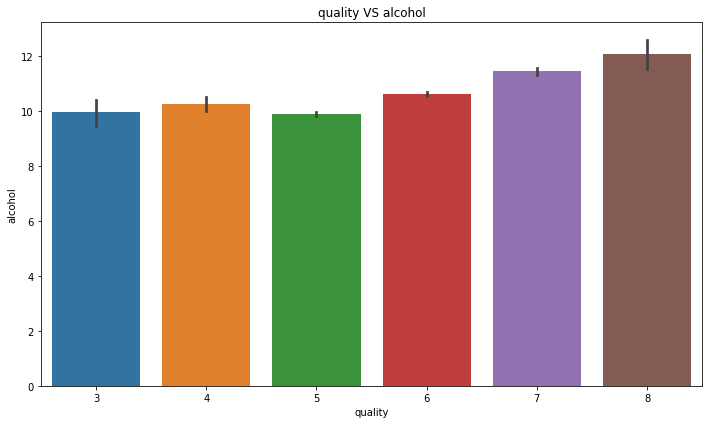

<Figure size 432x288 with 0 Axes>

In [35]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_acid, ax=axs)
plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Observation:
High quality wine contains more percentage of alcohol

## Box Plots

In [15]:
df.iplot(kind='box',title='box plot')

It looks awkard but with plotly  interactive plots you can understand easily just click on features to select them

# Distributions of features

In [16]:
df.values.shape

(1599, 12)

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
by_column = [df[x].values.tolist() for x in df.columns]


### Distribution Plot

In [19]:
fig=ff.create_distplot(by_column,df.columns)

iplot(fig)

Select the features whose distributions you want and deselect the features  you donot require 

## Pair  Plot

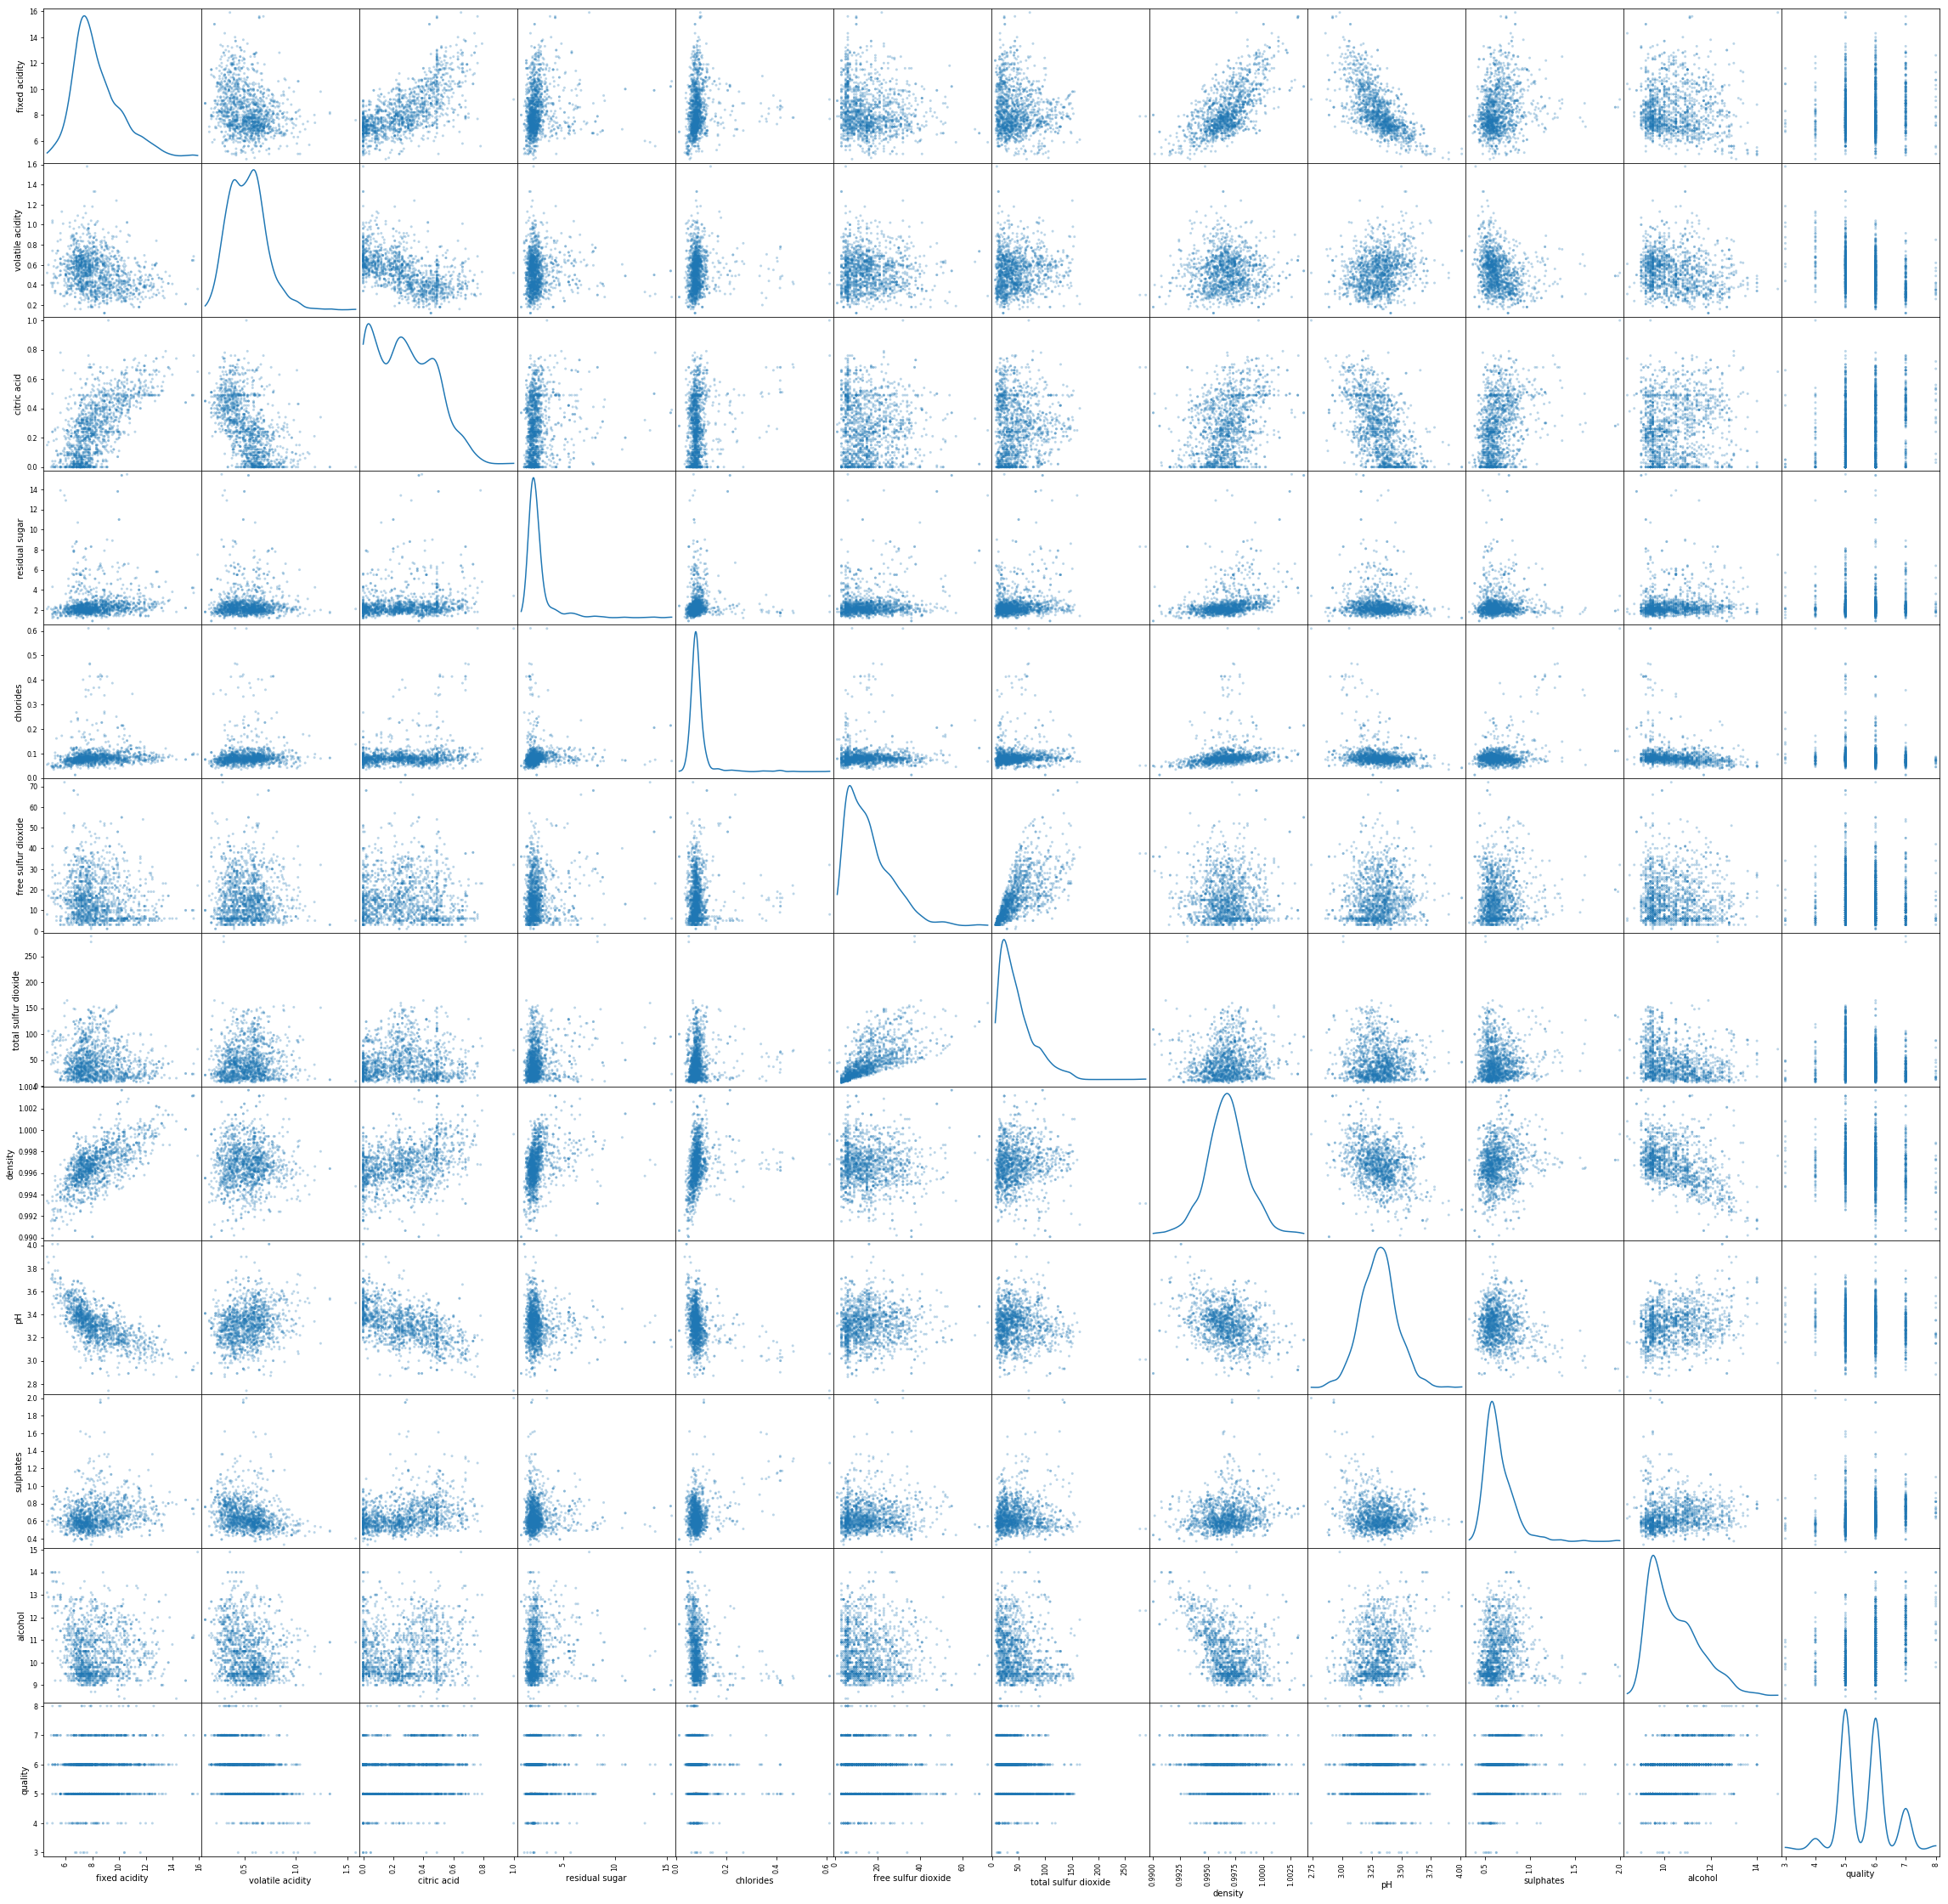

In [20]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

## Violin Plots

### pH

In [21]:
fig=ff.create_violin(df,data_header='pH')
iplot(fig)

### Fixed acidity

In [22]:
fig=ff.create_violin(df,data_header='fixed acidity')
iplot(fig)